In [48]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from collections import Counter
from itertools import combinations
from itertools import product

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pubs_author_funder=pubs_author_funder[pubs_author_funder.funder_country.notnull()]
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
7739777,65301283,"[Netherlands, Germany, Netherlands, United Sta...","[EU, Netherlands, Netherlands, Netherlands, Ne...",61,2016,0.000,0
7739778,65301284,"[Turkey, Canada, Canada]","[Canada, Turkey]",61,2016,0.000,0
7739779,65301319,[China],[China],14,2018,2.081,2
7739780,65301320,"[Russia, United Kingdom, Russia, Ukraine]",[United Kingdom],28,2017,0.000,0


In [13]:
pubs_author_funder['coll']=pubs_author_funder['author_country'].apply(lambda x:len(x))
coll_ath_fder=pubs_author_funder[pubs_author_funder.coll>1]
coll_ath_fder['domes_coll']=coll_ath_fder['author_country'].apply(lambda x:1 if len(set(x))==1 else 0)
coll_ath_fder

<ipython-input-13-0acddeb000a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coll_ath_fder['domes_coll']=coll_ath_fder['author_country'].apply(lambda x:1 if len(set(x))==1 else 0)


,id,author_country,funder_country,discipline,year,rel_citation,citation,coll,domes_coll
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,2,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,2,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,2,0
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,3,0
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,2,0
...,...,...,...,...,...,...,...,...,...
7739775,65301258,"[Portugal, Brazil]","[Portugal, Portugal, Portugal]",17,2012,0.292,8,2,0
7739776,65301282,"[Germany, Germany, Lithuania, Lithuania, Franc...","[Lithuania, EU]",100,2018,0.000,0,6,0
7739777,65301283,"[Netherlands, Germany, Netherlands, United Sta...","[EU, Netherlands, Netherlands, Netherlands, Ne...",61,2016,0.000,0,5,0
7739778,65301284,"[Turkey, Canada, Canada]","[Canada, Turkey]",61,2016,0.000,0,3,0


In [15]:
coll_ath_fder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,coll,domes_coll
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,2,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,2,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,2,0
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],89,2009,0.957,7,3,0
9,30585105,"[Canada, United States]",[Canada],89,2009,0.000,0,2,0


In [33]:
t_d

['b', 'a', 'd', 'c']

In [32]:
t = ['a','a','b','b','b','c','d','d','a']
t_d=list(set(t))
for item in combinations(t_d,2):
    print(item)

('b', 'a')
('b', 'd')
('b', 'c')
('a', 'd')
('a', 'c')
('d', 'c')


In [35]:
#number of funding unit payed from a to by
fundlist=[]
#number of relcit of the paper colloborated by a and b
relcitlist=[]
for index, row in coll_ath_fder.iterrows():
    domes=row['domes_coll'] #whether it is a purely domestic colloboration
    authorcntry=row['author_country']
    author_dist=list(set(authorcntry))
    fundercntry=row['funder_country']
    counter_funder=Counter(fundercntry)
    relcit=row['rel_citation']
    if domes==1: # internal colloboration and the cntry is pay for it
        cntry=authorcntry[0]
        if cntry in fundercntry:
            unit=counter_funder[cntry]
            fundlist.append([cntry,cntry,unit])
            relcitlist.append([cntry,cntry,relcit])
    else:         # external colloboration
        for cntry_a, cntry_b in combinations(author_dist,2):
            if cntry_a in fundercntry:
                unit=counter_funder[cntry_a]
                fundlist.append([cntry_a,cntry_b,unit])
            if cntry_b in fundercntry:
                unit=counter_funder[cntry_b]
                fundlist.append([cntry_b,cntry_a,unit])
            relcitlist.append([cntry_a,cntry_b,relcit])
            relcitlist.append([cntry_b,cntry_a,relcit])
        


In [40]:
fund_df=pd.DataFrame(fundlist,columns=['source','target','unit'])
fund_df=fund_df.groupby(['source','target'])['unit'].sum().reset_index()
fund_df.head()

,source,target,unit
0,Afghanistan,Iran,1
1,Albania,Austria,1
2,Albania,Germany,3
3,Albania,Italy,2
4,Albania,Netherlands,1


In [41]:
fund_df=fund_df.pivot(index='source',columns='target',values='unit')
fund_df=fund_df.fillna(0)
fund_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,484.0,0.0,0.0,0.0,0.0,4.0,0.0,17.0,...,56.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
relcit_df=pd.DataFrame(relcitlist, columns=['source','target','citation'])
relcit_df=relcit_df.groupby(['source','target'])['citation'].sum().reset_index()
relcit_df=relcit_df.pivot(index='source',columns='target',values='citation')
relcit_df=relcit_df.fillna(0)
relcit_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,0.000,73.778,0.0,83.240,0.0,0.0,354.321,0.000,698.646,...,744.609,306.125,0.000,0.0,0.0,0.000,420.095,0.000,285.951,0.000
Albania,0.000,0.000,82.407,0.0,0.000,0.0,0.0,75.296,17.520,91.495,...,220.161,72.940,16.258,0.0,0.0,73.210,72.940,72.940,30.656,0.000
Algeria,73.778,82.407,379.350,0.0,182.412,0.0,0.0,740.308,67.483,2047.276,...,2480.370,485.787,0.195,0.0,0.0,358.407,1408.141,475.954,991.890,164.392
Andorra,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,6.117,...,6.117,0.000,0.000,0.0,0.0,0.468,0.000,0.000,0.000,0.000
Angola,83.240,0.000,182.412,0.0,0.000,0.0,0.0,159.307,0.000,213.432,...,292.902,173.545,0.000,0.0,0.0,1.249,195.158,1.975,192.534,109.159


In [50]:
fund_df.loc['China','China']

2534924.0

In [53]:
citperunit = pd.DataFrame().reindex_like(fund_df).fillna(0)
source=fund_df.index
target=fund_df.columns
for s,t in product(source, target):
    unit=fund_df.loc[s,t]
    cit=relcit_df.loc[s,t]
    if unit !=0:
        perunit=cit/unit
        citperunit.loc[s,t]=perunit


In [91]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [94]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index()
cntry_out.columns=['country','unit_out']
cntry_out=cntry_out.sort_values(by="unit_out", ascending=False)
cntry_out=cntry_out[cntry_out.country!="EU"]
top20_df=cntry_out.head(20)
cntry_top20=top20_df.country

In [63]:
import seaborn as sns

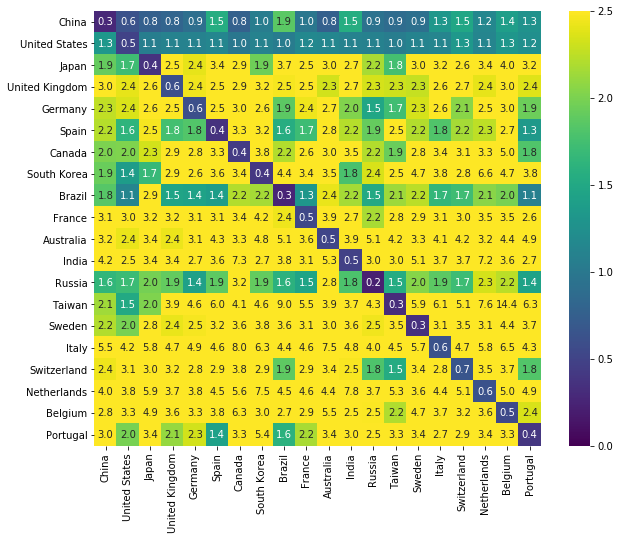

In [97]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    citperunit.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20,vmin=0,vmax=2.5,
cmap='viridis')
plt.savefig("citation_per_unit.pdf", format="pdf",bbox_inches="tight")